## Lesson 08 —  Plotting with Matplotlib

This lesson is based on the notebook "Matplotlib - 2D and 3D plotting in Python" by J.R. Johansson (jrjohansson at gmail.com). His version of this notebook is available at [https://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures). The other notebooks in this lecture series are indexed at [jrjohansson.github.io](https://jrjohansson.github.io).

### Readings

* [_Plotting and Visualization_, by Wes McKinney](https://wesmckinney.com/book/plotting-and-visualization)
* [_Matplotlib Gallery_, by Matplotlib](https://matplotlib.org/stable/gallery/): A large gallery showcasing various types of plots Matplotlib can create. Highly recommended!
* [_Matplotlib_, by Python Graph Gallery](https://python-graph-gallery.com/matplotlib/): useful tips for presentation of high-quality Matplotlib plots. Also contains a gallery of plots, not limited to matplotlib.
* [_Matplotlib 2D and 3D plotting in Python_, by Johansson](http://github.com/jrjohansson/scientific-python-lectures)
* [_Choosing color palettes_, by Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

### Table of Contents

* [Introduction](#Introduction)
* [MATLAB-like API](#MATLAB-like-API)
* [Matplotlib Object Oriented API](#The-Matplotlib-object-oriented-API)
* [Figure size, aspect ratio and DPI](#Figure-size,-aspect-ratio-and-DPI)
* [Saving figures](#Saving-figures)
* [Legends, labels and titles](#Legends,-labels-and-titles)
* [Formatting text: LaTeX, fontsize, font family](#Formatting-text:-LaTeX,-fontsize,-font-family)
* [Setting colors, linewidths, linetypes](#Setting-colors,-linewidths,-linetypes)
* [Control over axis appearance](#Control-over-axis-appearance)
* [Placement of ticks and custom tick labels](#Placement-of-ticks-and-custom-tick-labels)
* [Axis number and axis label spacing](#Axis-number-and-axis-label-spacing)
* [Axis grid](#Axis-grid)
* [Axis spines](#Axis-spines)
* [Twin axes](#Twin-axes)
* [Axes where x and y are zero](#Axes-where-x-and-y-are-zero)
* [Other 2D plot styles](#Other-2D-plot-styles)
* [Text annotation](#Text-annotation)
* [Figures with multiple subplots and insets](#Figures-with-multiple-subplots-and-insets)
* [Colormap and contour figures](#Colormap-and-contour-figures)
* [3D figures](#3D-figures)

In [1]:
# This line configures matplotlib to show figures embedded in the notebook,
# instead of opening a new window for each figure. More about that later.
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that makes matplotlib highly suitable for generating figures for scientific publications, is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: https://matplotlib.org/

To get started using Matplotlib in a Python program, include the symbols from the `pylab` module (a handy MATLAB emulator):

In [2]:
from pylab import *

or import the `matplotlib.pyplot` module under the name `plt` (the fully functional Matplotlib):

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib, called `pylab`. 

`pylab` is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

**Hint:** If you are not familiar with Matlab syntax you may skip this section completely.

### Example

A simple figure with MATLAB-like plotting API:

In [5]:
x = np.linspace(0, 5, 10)
y = x**2

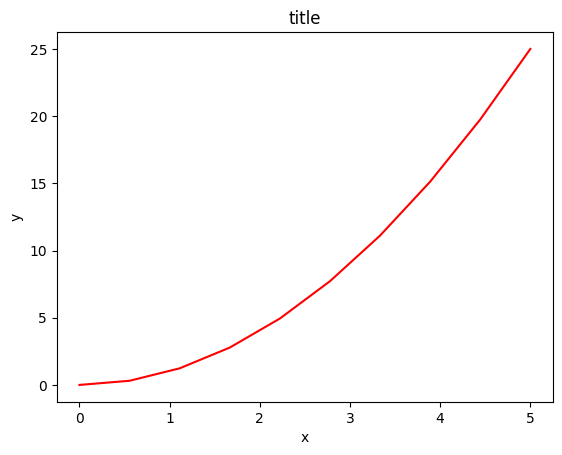

In [6]:
figure()
plot(x, y, "r")
xlabel("x")
ylabel("y")
title("title");
# show()

Most of the plotting related functions in MATLAB are covered by the `pylab` module (and by `matplotlib.pyplot`). For example, subplot and color/symbol selection:

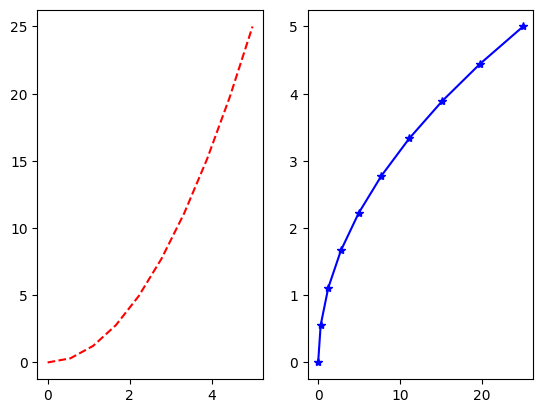

In [7]:
subplot(1, 2, 1)
plot(x, y, "r--")
subplot(1, 2, 2)
plot(y, x, "b*-");

## The Matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

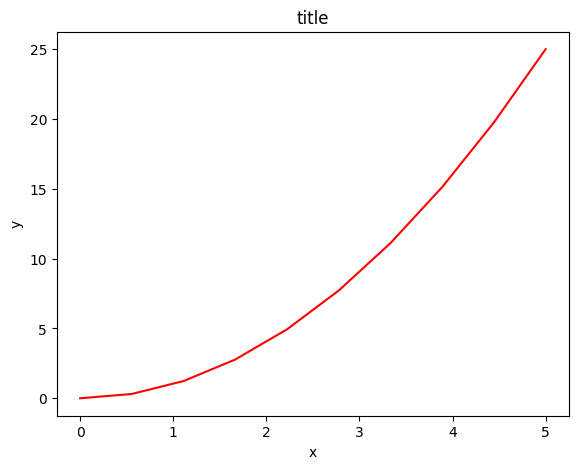

In [8]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # left, bottom, width, height

axes.plot(x, y, "r")

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("title");

Although a little bit more code is involved, the advantage to `matplotlib.pyplot` is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure. For example:

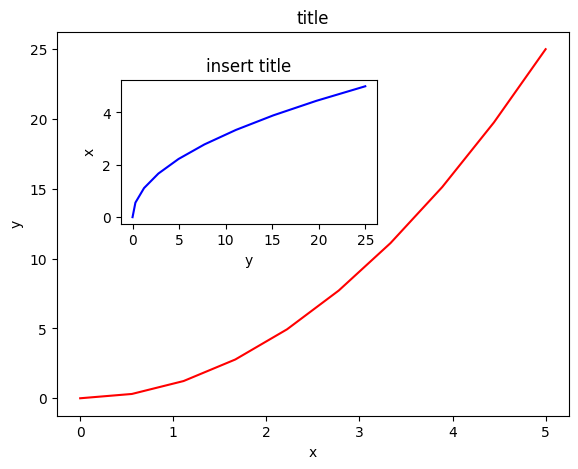

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])  # inset axes (plot inside of the original figure)

# main figure
axes1.plot(x, y, "r")
axes1.set_xlabel("x")
axes1.set_ylabel("y")
axes1.set_title("title")

# inset
axes2.plot(y, x, "b")
axes2.set_xlabel("y")
axes2.set_ylabel("x")
axes2.set_title("insert title");

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. The most common is `subplots`, which can be used like this:

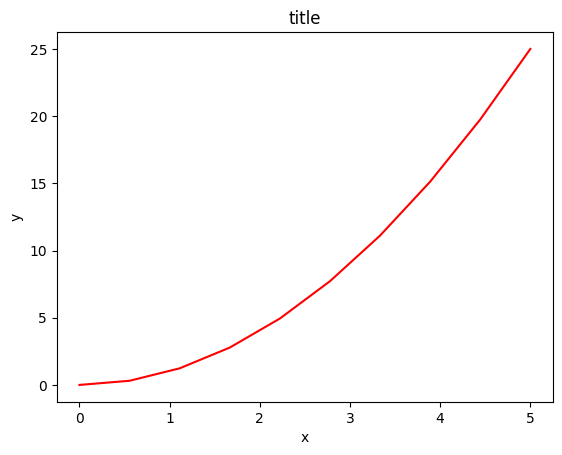

In [10]:
fig, axes = plt.subplots()

axes.plot(x, y, "r")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("title");

You may specify how the figure will stack when plotting multiple figures — you will then receive the axis as an array instead:

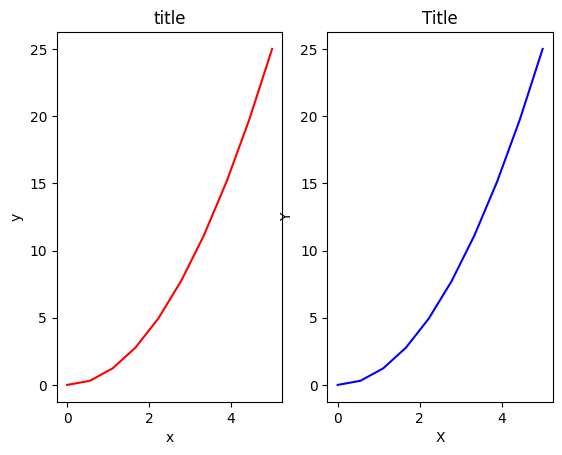

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x, y, "r")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("title")

axes[1].plot(x, y, "b")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Title");

In [12]:
axes

array([<Axes: title={'center': 'title'}, xlabel='x', ylabel='y'>,
       <Axes: title={'center': 'Title'}, xlabel='X', ylabel='Y'>],
      dtype=object)

That was easy, but it isn't so pretty with overlapping figure axes and labels, right? (see the overlapping Y label)

We can deal with that by using the `fig.tight_layout` method, which tries to automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

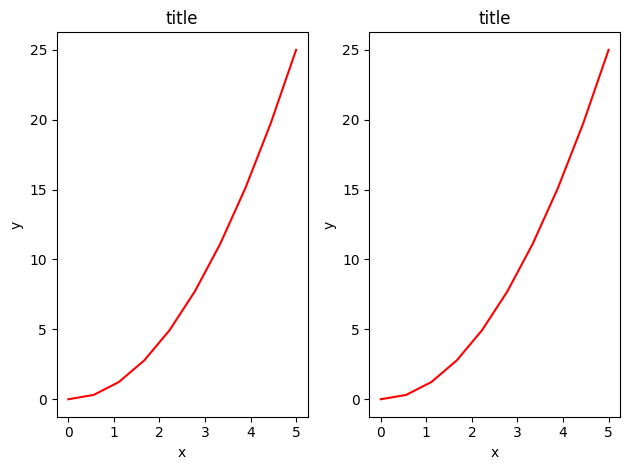

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# we can use a for loop, because axes is an array of axes handles
for ax in axes:
    ax.plot(x, y, "r")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("title")

fig.tight_layout()

Although we prefer to create figure and axes objects using `plt.subplots()` and then plot using `ax.plot()`, we can use `plt.plot()` directly. It will automatically create the figure and axes for us, but we won't have handles to make changes to them:

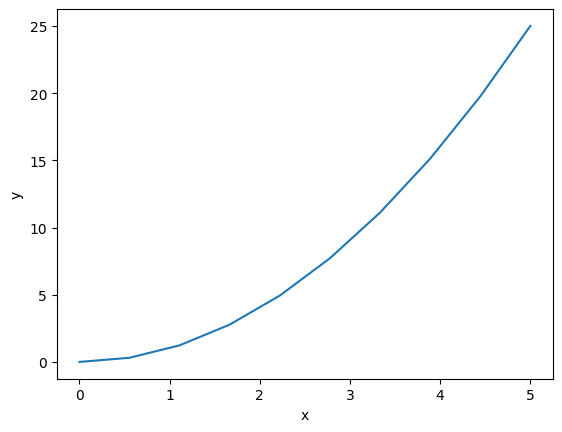

In [14]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y");

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [15]:
fig = plt.figure(figsize=(8, 4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

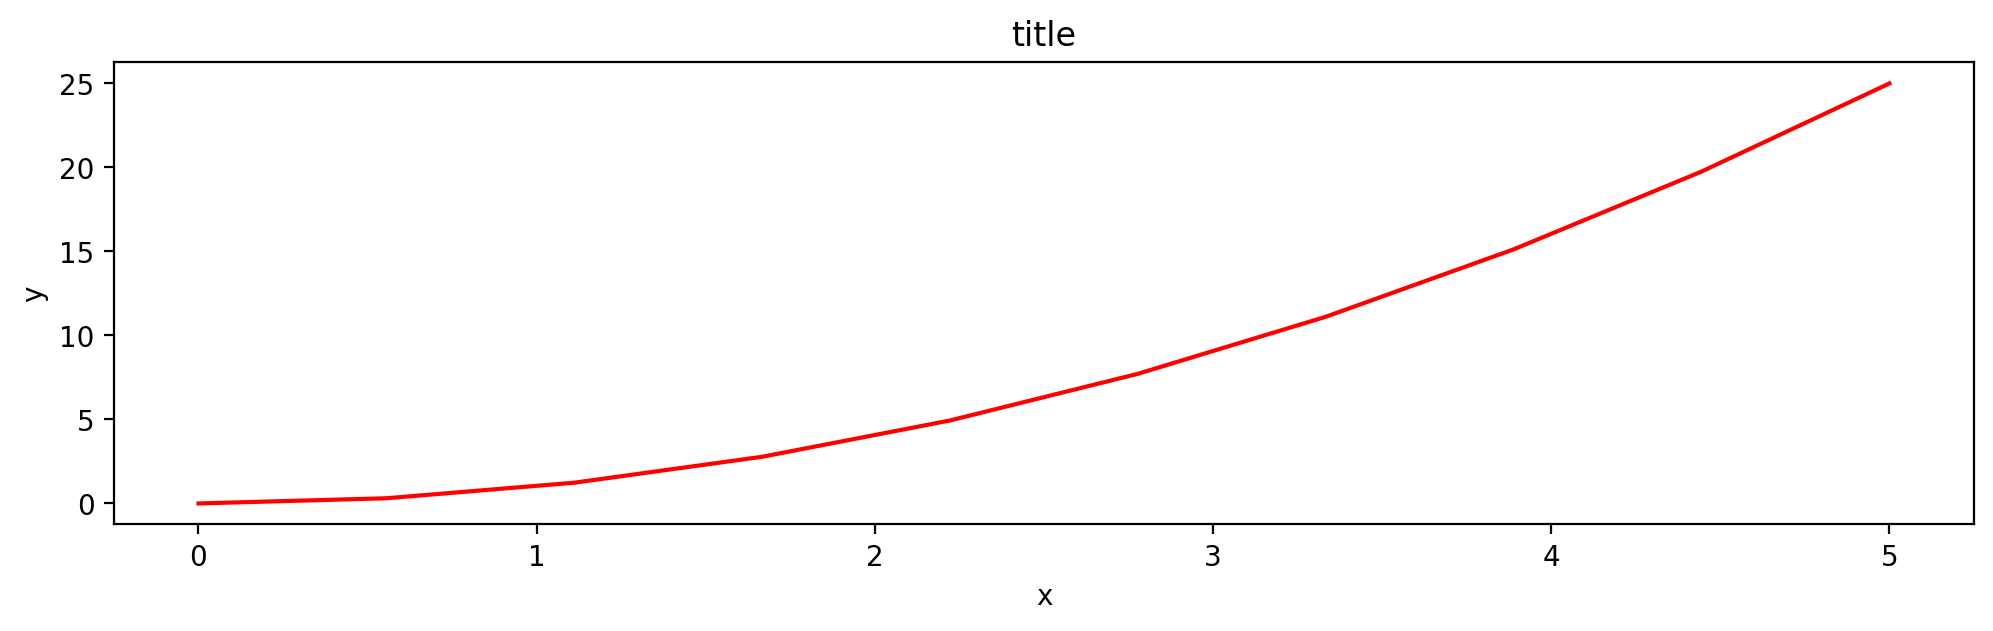

In [16]:
fig, axes = plt.subplots(figsize=(12, 3), dpi=200)

axes.plot(x, y, "r")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("title");

<a id="saving"></a>

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [17]:
fig.savefig("myplot.pdf")

Here we can also optionally specify the DPI and choose between different output formats:

In [18]:
fig.savefig("myplot.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command.) In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

In [19]:
ax = axes

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [20]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [21]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [22]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [23]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See [Axes.legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) for details. Some of the most common `loc` values are:

In [24]:
ax.legend(loc="best")  # let matplotlib decide the optimal location
ax.legend(loc="upper right")  # upper right corner
ax.legend(loc="upper left")  # upper left corner
ax.legend(loc="lower left")  # lower left corner
ax.legend(loc="lower right");  # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

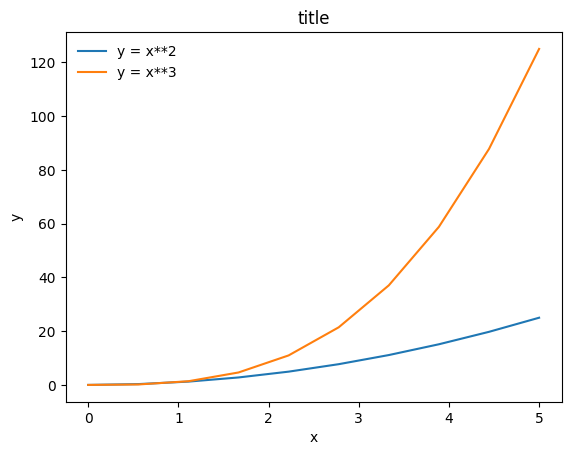

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc="upper left", frameon=False)  # `frameon` adds or removes the border frame for the legend
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("title");

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have $\LaTeX$ formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our LaTex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`.

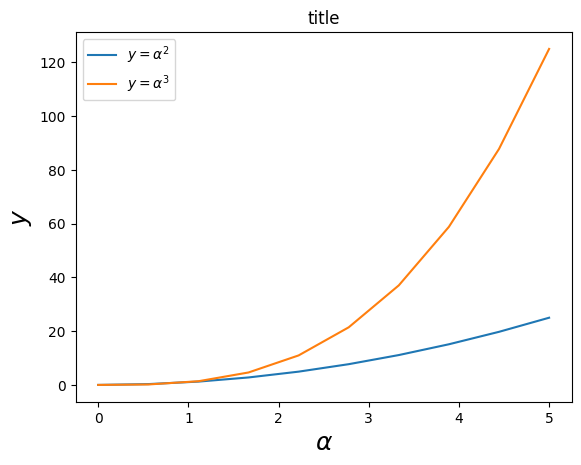

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc="upper left")  # upper left corner
ax.set_xlabel(r"$\alpha$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_title("title");

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [27]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({"font.size": 18, "font.family": "serif"})

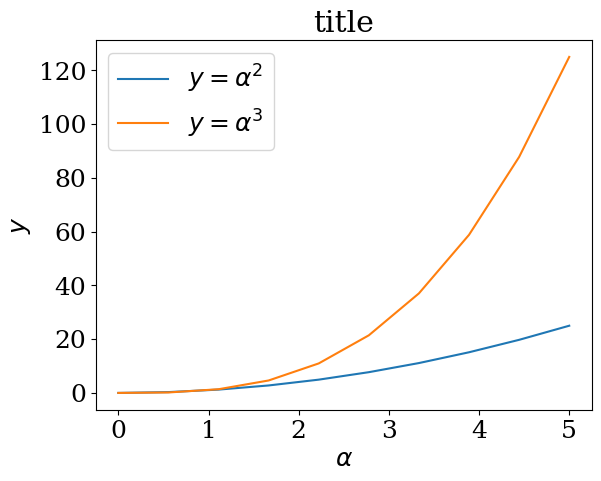

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2)  # upper left corner
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$y$")
ax.set_title("title");

A good choice of global fonts are the STIX fonts: 

In [29]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({"font.size": 18, "font.family": "STIXGeneral", "mathtext.fontset": "stix"})

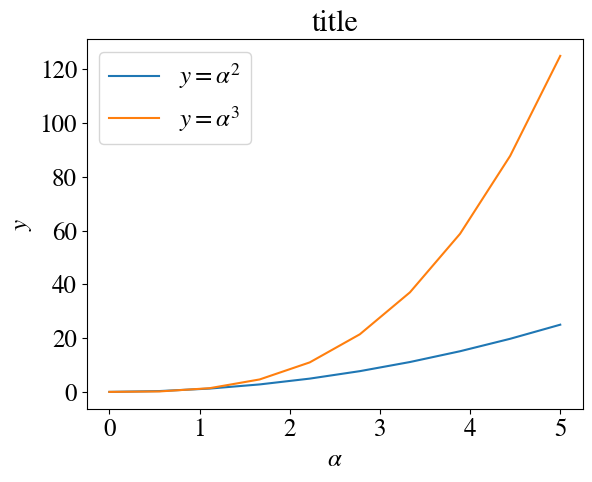

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2)  # upper left corner
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$y$")
ax.set_title("title");

Here are a couple of example fonts to try out:

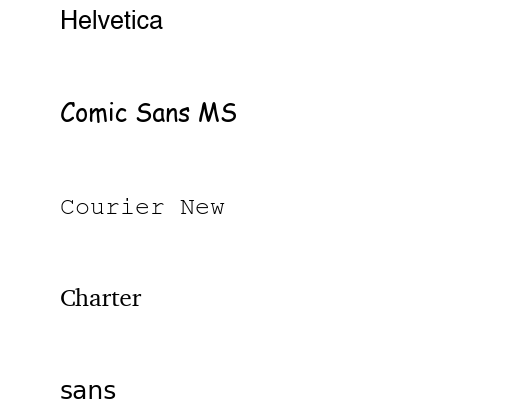

In [31]:
fig, ax = plt.subplots()
ax.axis("off")
for idx, font_name in enumerate(
    [
        "Helvetica",
        "Comic Sans MS",
        "Courier New",
        "Charter",
        "sans",
    ]
):
    txt = ax.text(0.1, 1 - idx / 4, font_name, family=font_name)

In [32]:
# restore previous settings
matplotlib.rcParams.update({"font.size": 12, "font.family": "sans"})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, `'b.-'` means a blue line with dots:

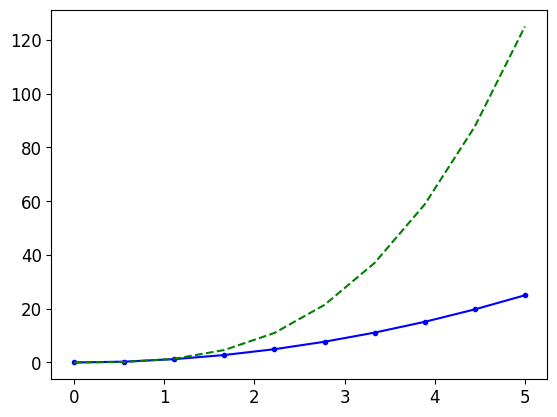

In [33]:
# MATLAB style line color and style
fig, ax = plt.subplots()

ax.plot(x, x**2, "b.-")  # blue line with dots
ax.plot(x, x**3, "g--");  # green dashed line

We can also define colors by their names or [RGB hex codes](https://www.rapidtables.com/web/color/RGB_Color.html) and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

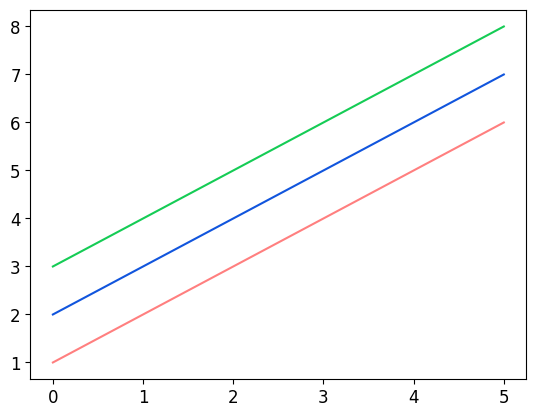

In [34]:
fig, ax = plt.subplots()

ax.plot(x, x + 1, color="red", alpha=0.5)  # half-transparant red
ax.plot(x, x + 2, color="#1155dd")  # RGB hex code for a bluish color
ax.plot(x, x + 3, color="#15cc55");  # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

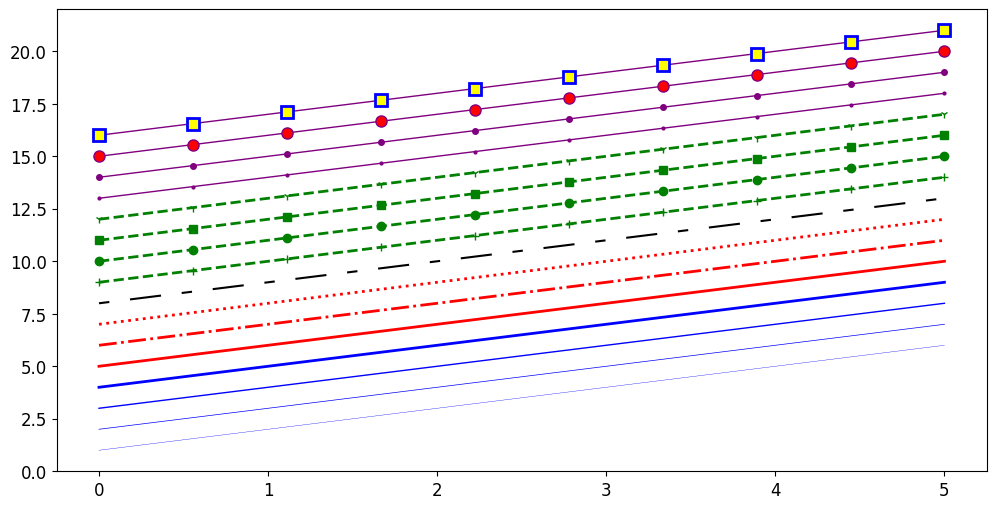

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

# different linewidths
ax.plot(x, x + 1, color="blue", linewidth=0.25)
ax.plot(x, x + 2, color="blue", linewidth=0.50)
ax.plot(x, x + 3, color="blue", linewidth=1.00)
ax.plot(x, x + 4, color="blue", linewidth=2.00)

# possible linestyle options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x + 5, color="red", lw=2, linestyle="-")
ax.plot(x, x + 6, color="red", lw=2, ls="-.")
ax.plot(x, x + 7, color="red", lw=2, ls=":")

# custom dash
line = ax.plot(x, x + 8, color="black", lw=1.50)[0]
line.set_dashes([5, 10, 15, 10])  # format: 5pt line, 10pt break, 15pt line, 10pt break, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x + 9, color="green", lw=2, ls="--", marker="+")
ax.plot(x, x + 10, color="green", lw=2, ls="--", marker="o")
ax.plot(x, x + 11, color="green", lw=2, ls="--", marker="s")
ax.plot(x, x + 12, color="green", lw=2, ls="--", marker="1")

# marker size and color
ax.plot(x, x + 13, color="purple", lw=1, ls="-", marker="o", markersize=2)
ax.plot(x, x + 14, color="purple", lw=1, ls="-", marker="o", markersize=4)
ax.plot(x, x + 15, color="purple", lw=1, ls="-", marker="o", markersize=8, markerfacecolor="red")
ax.plot(
    x,
    x + 16,
    color="purple",
    lw=1,
    ls="-",
    marker="s",
    markersize=8,
    markerfacecolor="yellow",
    markeredgewidth=2,
    markeredgecolor="blue",
);

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

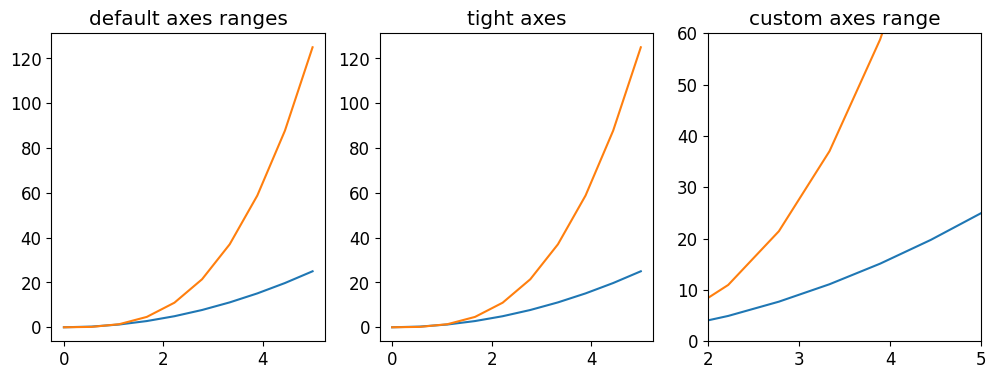

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)  # <- notice how this plot uses *args to plot multiple lines in one command
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis("tight")
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set separately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case, see all [accepted parameters](https://matplotlib.org/stable/api/scale_api.html)):

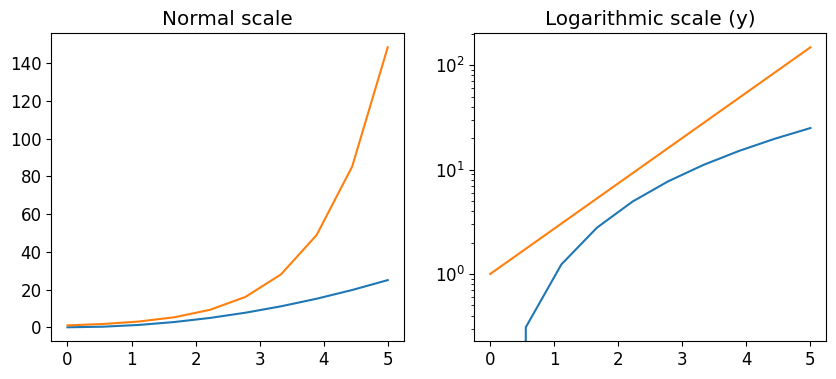

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

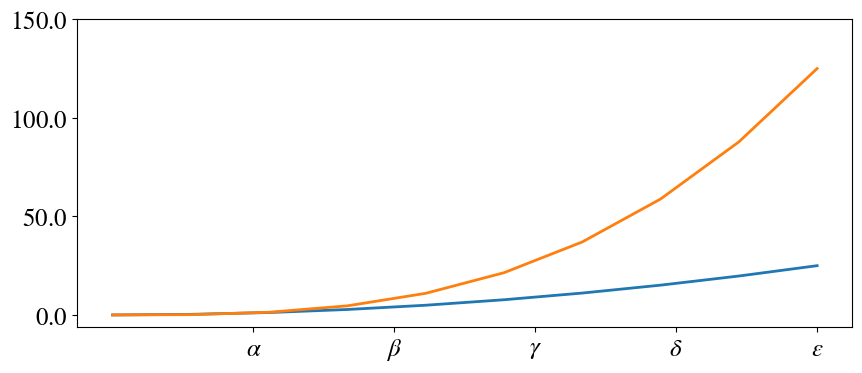

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r"$\alpha$", r"$\beta$", r"$\gamma$", r"$\delta$", r"$\epsilon$"], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels([f"${y:.1f}$" for y in yticks], fontsize=18);

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See [Ticker API documentation](https://matplotlib.org/stable/api/ticker_api.html) for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

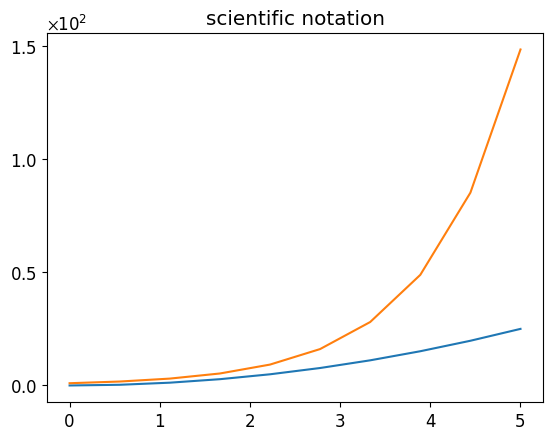

In [39]:
from matplotlib import ticker

fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

# set custom ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(formatter)

### Axis number and axis label spacing

You can adjust the distance between the axis and the plot, and the distance between the label and the axis by defining extra padding:

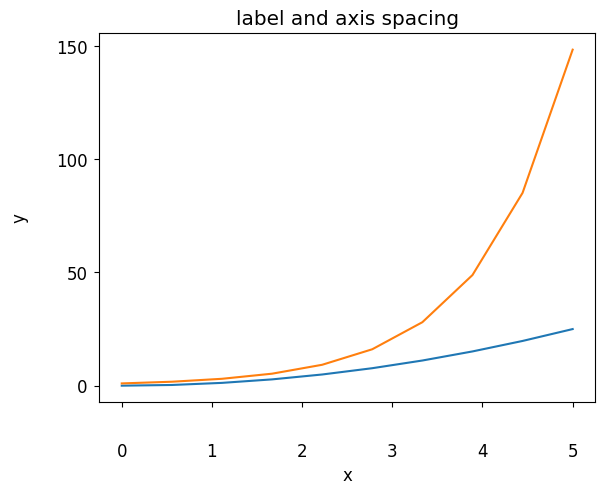

In [40]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# distance between x and y axis and the numbers on the axes
ax.tick_params(axis="x", which="major", pad=25)
ax.tick_params(axis="y", which="major", pad=5)

# padding between axis label and axis numbers
ax.set_xlabel("x", labelpad=5)
ax.set_ylabel("y", labelpad=20);

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

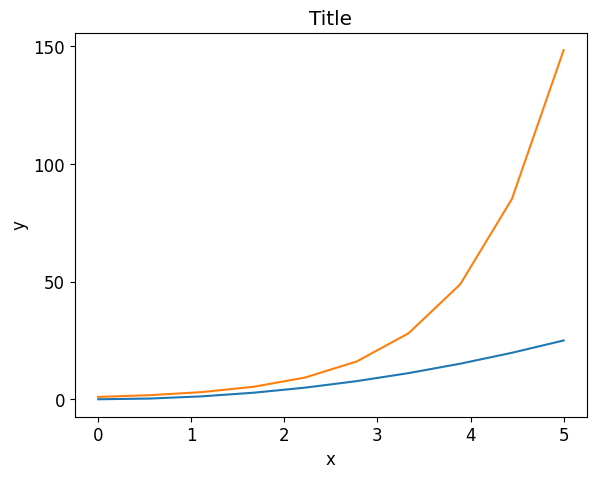

In [41]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
fig.savefig("clipped_plot.png")

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

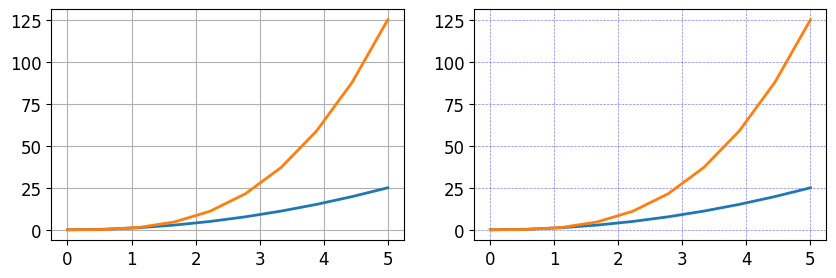

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid()

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color="b", alpha=0.5, linestyle="dashed", linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

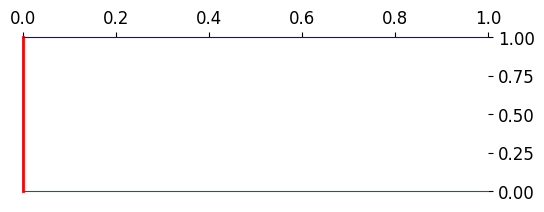

In [43]:
fig, ax = plt.subplots(figsize=(6, 2))

ax.spines["bottom"].set_color("green")
ax.spines["top"].set_color("blue")

ax.spines["left"].set_color("red")
ax.spines["left"].set_linewidth(2)

# turn off axis spine to the right
ax.spines["right"].set_color("none")
ax.yaxis.tick_right()  # only ticks on the right side
ax.xaxis.tick_top()  # only ticks on the top side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

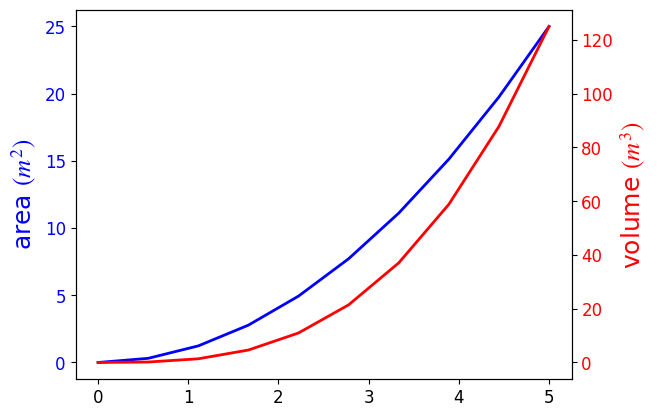

In [44]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y are zero

By default, the axis will try to center your plot the best it can, which would mean shifting the position `(0, 0)` relative to the axis.

You can correct it by setting the x and y positions manually:

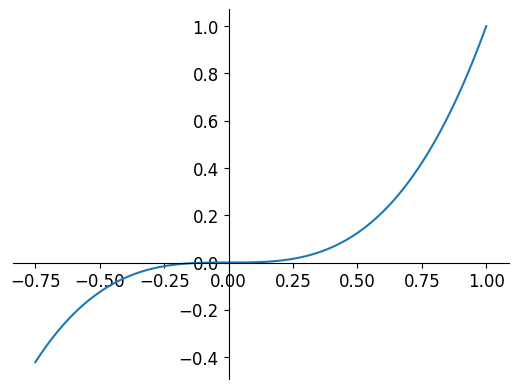

In [45]:
fig, ax = plt.subplots()

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_position(("data", 0))  # set position of x spine to x=0

ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("data", 0))  # set position of y spine to y=0

xx = np.linspace(-0.75, 1.0, 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the [Matplotlib Plot Gallery](http://matplotlib.org/gallery.html) for a complete list of available plot types. Some of the more useful ones are show below:

In [46]:
n = np.array([0, 1, 2, 3, 4, 5])

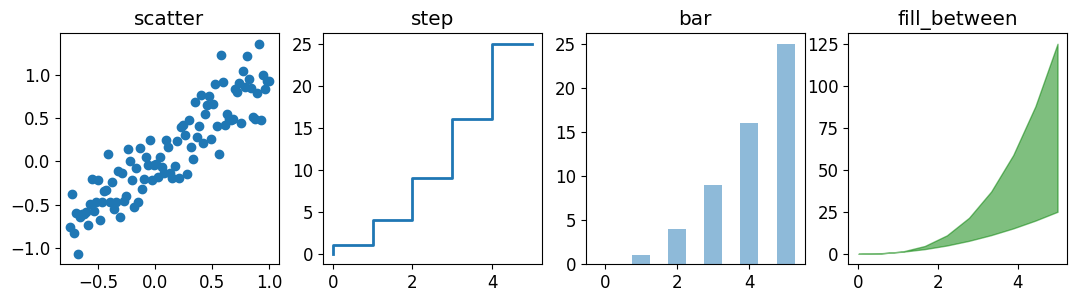

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between");

#### Polar

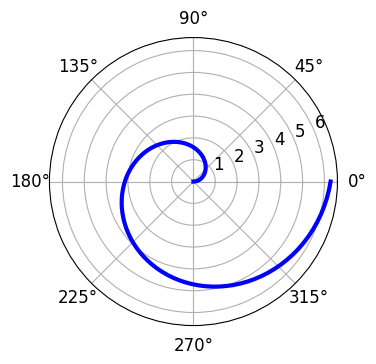

In [48]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 0.6, 0.6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color="blue", lw=3);

#### Histogram

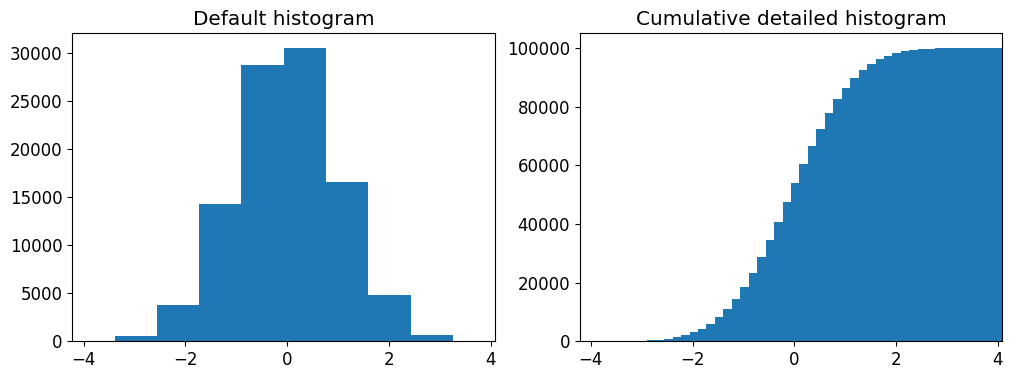

In [49]:
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

#### Stacked bar (vertical)

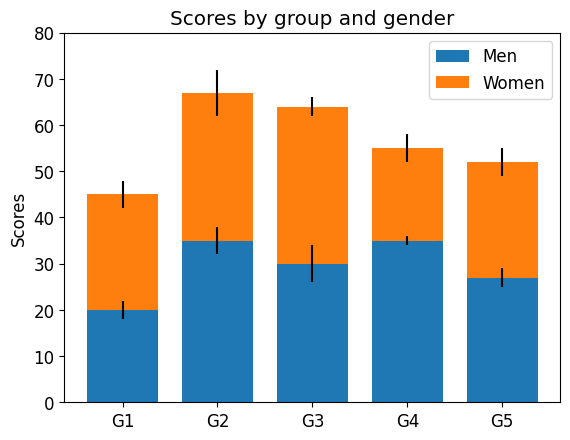

In [50]:
# bar example
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)
men_std = (2, 3, 4, 1, 2)
women_std = (3, 5, 2, 3, 3)
ind = np.arange(N)  # the x locations for the groups
width = 0.75  # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x=ind, height=men_means, width=width, yerr=men_std)
p2 = plt.bar(x=ind, height=women_means, width=width, bottom=men_means, yerr=women_std)

plt.ylabel("Scores")
plt.title("Scores by group and gender")
plt.xticks(ind, ("G1", "G2", "G3", "G4", "G5"))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ("Men", "Women"));

#### Stacked bar (horizontal)

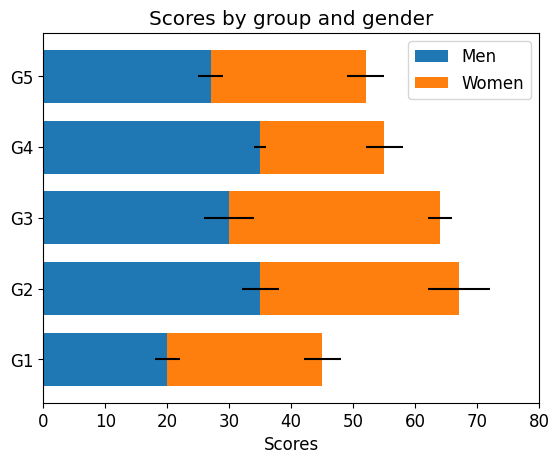

In [51]:
# barh example
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)
men_std = (2, 3, 4, 1, 2)
women_std = (3, 5, 2, 3, 3)
ind = np.arange(N)  # the x locations for the groups
width = 0.75  # the width of the bars: can also be len(x) sequence

p1 = plt.barh(y=ind, width=men_means, height=width, xerr=men_std)
p2 = plt.barh(y=ind, width=women_means, height=width, left=men_means, xerr=women_std)

plt.xlabel("Scores")
plt.title("Scores by group and gender")
plt.yticks(ind, ("G1", "G2", "G3", "G4", "G5"))
plt.xticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ("Men", "Women"));

#### Pie

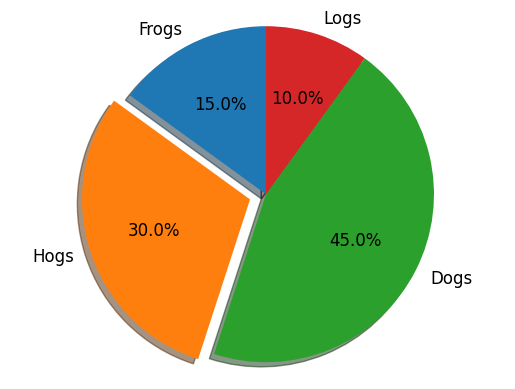

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Frogs", "Hogs", "Dogs", "Logs"
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal");  # Equal aspect ratio ensures that pie is drawn as a circle.

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function and passing the exact x and y positions for the text location. It supports LaTeX formatting just like axis label texts and titles:

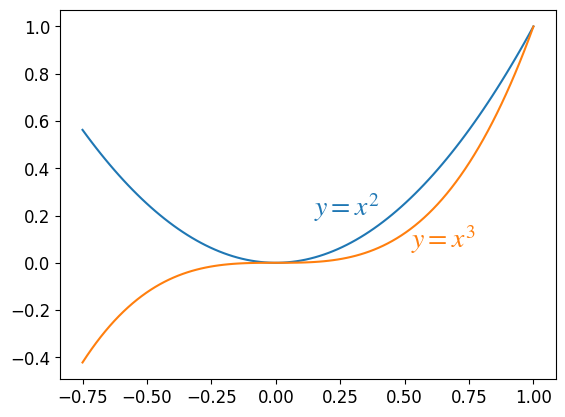

In [53]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="tab:blue")  # tab means Tableau Colors, to match the plot's color
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="tab:orange", horizontalalignment="center", verticalalignment="center");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

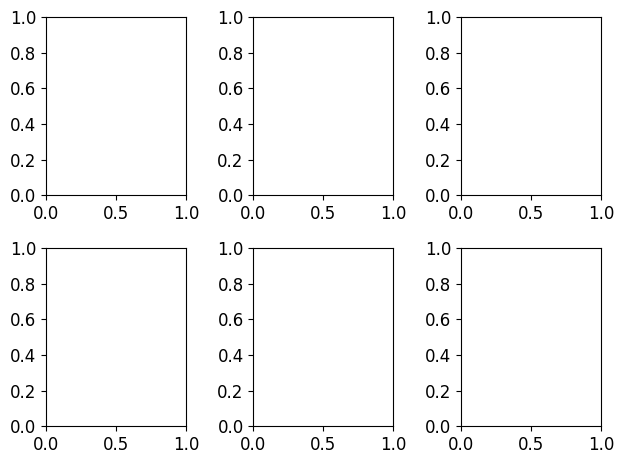

In [54]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

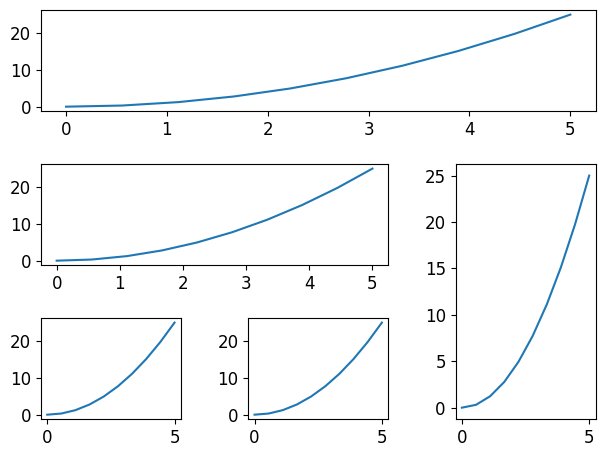

In [55]:
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))
fig.tight_layout()

for axis in [ax1, ax2, ax3, ax4, ax5]:
    axis.plot(x, y)

#### gridspec

In [56]:
import matplotlib.gridspec as gridspec

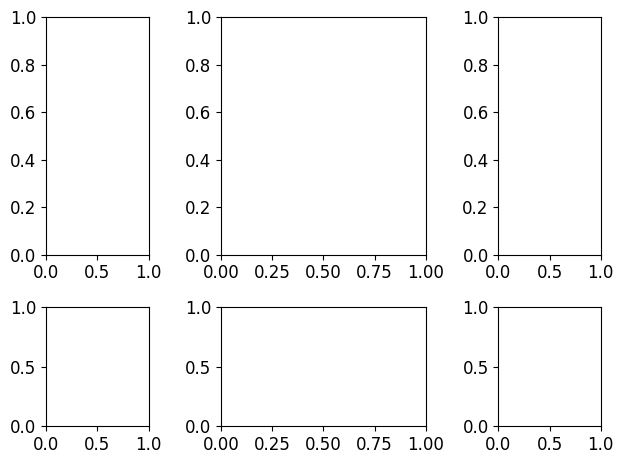

In [57]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2, 1], width_ratios=[1, 2, 1])
for g in gs:
    ax = fig.add_subplot(g)

fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

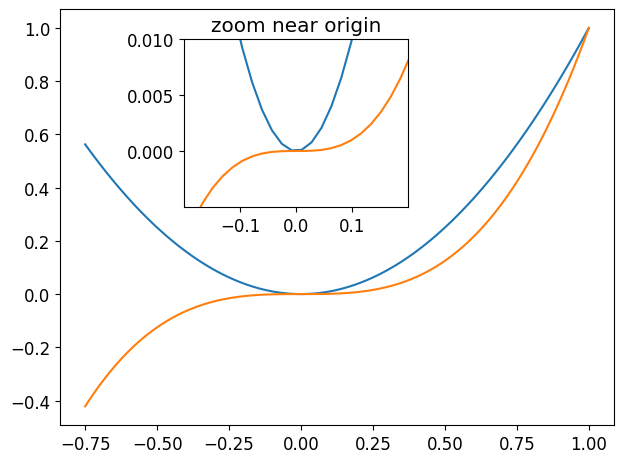

In [58]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.55, 0.35, 0.35])  # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title("zoom near origin")

# set axis range
inset_ax.set_xlim(-0.2, 0.2)
inset_ax.set_ylim(-0.005, 0.01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1, 0, 0.1]);

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see [colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

In [59]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5


def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2 * phi_p)

In [60]:
phi_m = np.linspace(0, 2 * np.pi, 100)
phi_p = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor - pseudocolor plot of a 2-D array

`pcolor` will plot, based on a 2-D array `Z`, the plot with the third dimension (`Z` absolute value) represented as color:

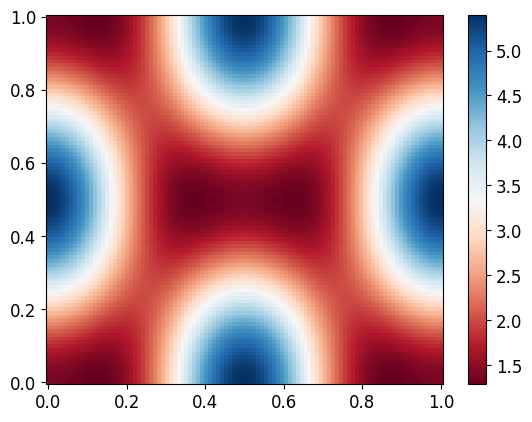

In [61]:
fig, ax = plt.subplots()

p = ax.pcolor(X / (2 * np.pi), Y / (2 * np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow - display an image on the axes

`imshow` will do a similar job, but you provide the axis expected limits via the `extent` keyword. It will create the axis limits automatically.

[Interpolation](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html) smooths out an image by doing resampling.

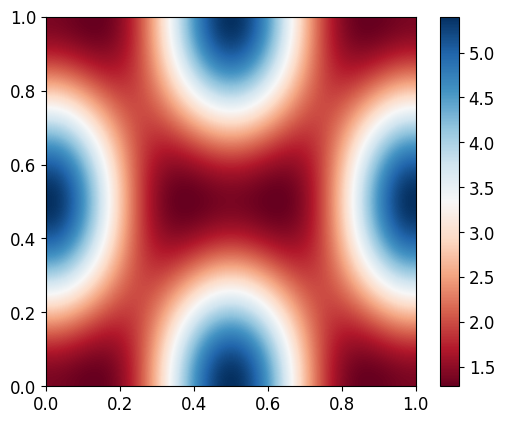

In [62]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation("bilinear")

cb = fig.colorbar(im, ax=ax)

#### contour - plot contours

`contour` will try to infer key contours of the original plot based on the data. You may also provide the option `levels` to  

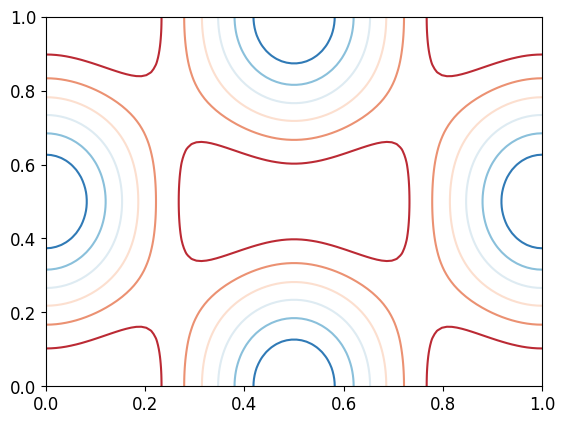

In [63]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

<a id="3d"></a>

## 3D figures

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [64]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

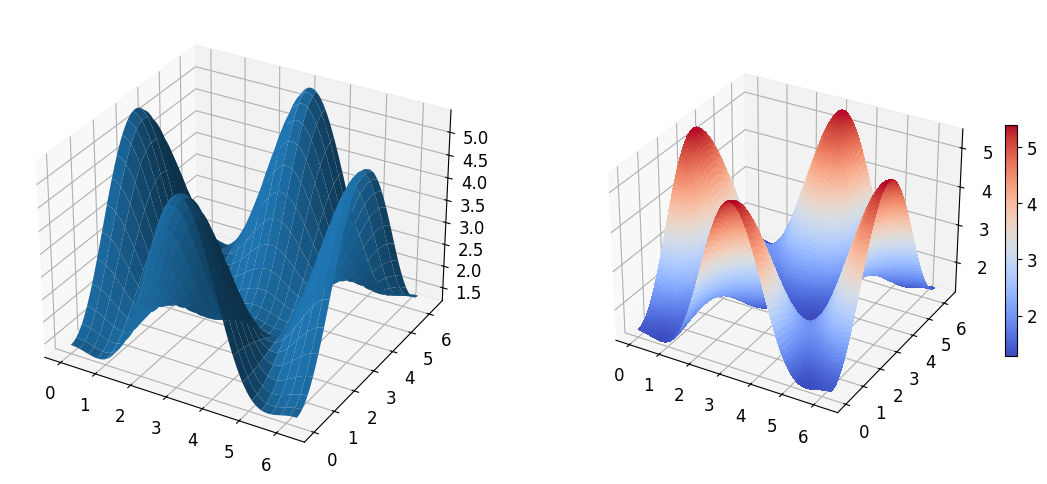

In [65]:
fig = plt.figure(figsize=(14, 6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection="3d")

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection="3d")
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plots

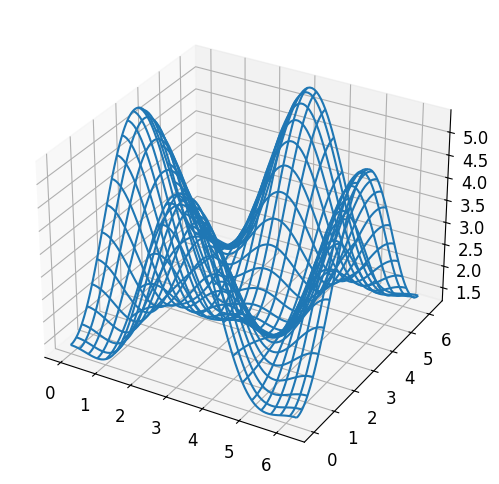

In [66]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(1, 1, 1, projection="3d")

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Contour plots with projections

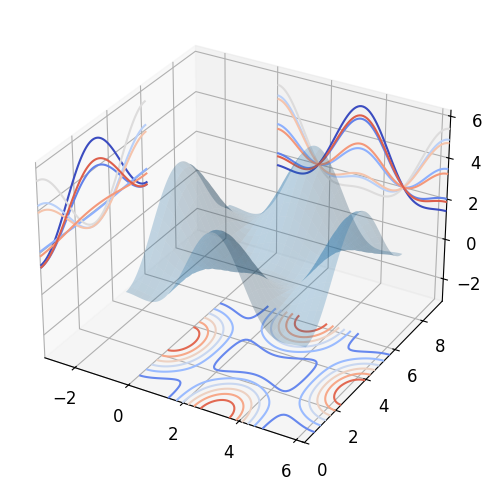

In [67]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir="z", offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir="x", offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir="y", offset=3 * np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2 * np.pi)
ax.set_ylim3d(0, 3 * np.pi)
ax.set_zlim3d(-np.pi, 2 * np.pi);